# Assignment Number : Two (2)
# Name: Francis Kwame Segbe
# Course: Time Series Analysis

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,acf
import numpy as np
from io import StringIO
from scipy.signal import find_peaks
import statsmodels.api as sm
from statsmodels import datasets

# Question Number 1

# a.

In [59]:
data = pd.read_csv('robberies.csv')

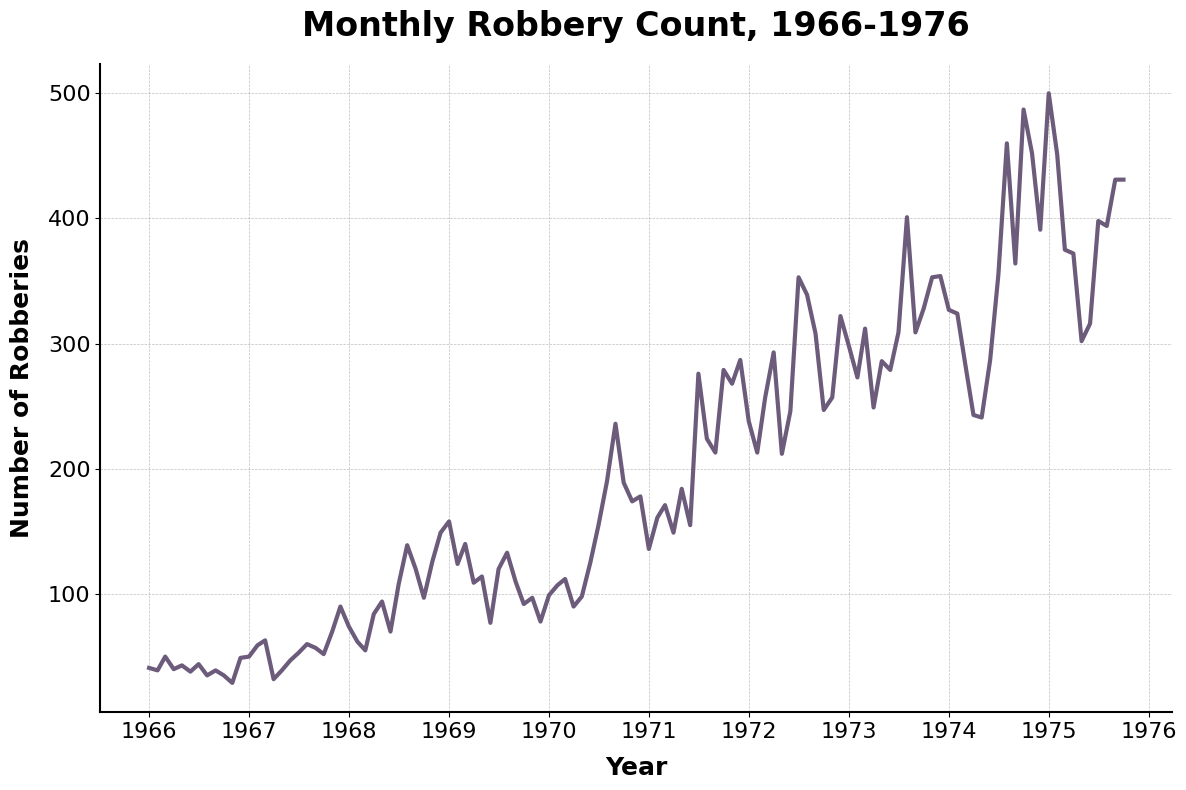

In [60]:
# Convert the data into a pandas DataFrame
robberies = pd.DataFrame(data, columns=['Month', 'Robberies'])
robberies['Month'] = pd.to_datetime(robberies['Month'])
robberies['Robberies'] = pd.to_numeric(robberies['Robberies'])
robberies.set_index('Month', inplace=True)

# Define custom color palette
color_palette = ['#6c5b7b']

# Visualize the data
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(robberies, color=color_palette[0], linewidth=3)
ax.set_xlabel('Year', fontsize=18, fontweight='bold', labelpad=10)
ax.set_ylabel('Number of Robberies', fontsize=18, fontweight='bold', labelpad=10)
ax.set_title('Monthly Robbery Count, 1966-1976', fontsize=24, fontweight='bold', pad=20)
ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

In [61]:
# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(robberies['Robberies'])
print('ADF Statistic: {}'.format(adf_result[0]))
print('p-value: {}'.format(adf_result[1]))
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t{}: {}'.format(key, value))

# Interpret the results
if adf_result[0] < adf_result[4]['5%']:
    print("Reject the null hypothesis (H0). The time series is stationary.")
else:
    print("We do not reject the null hypothesis (H0). The time series is non-stationary.")

ADF Statistic: 1.0011021402457787
p-value: 0.994277563805723
Critical Values:
	1%: -3.4936021509366793
	5%: -2.8892174239808703
	10%: -2.58153320754717
We do not reject the null hypothesis (H0). The time series is non-stationary.


# Q1b.

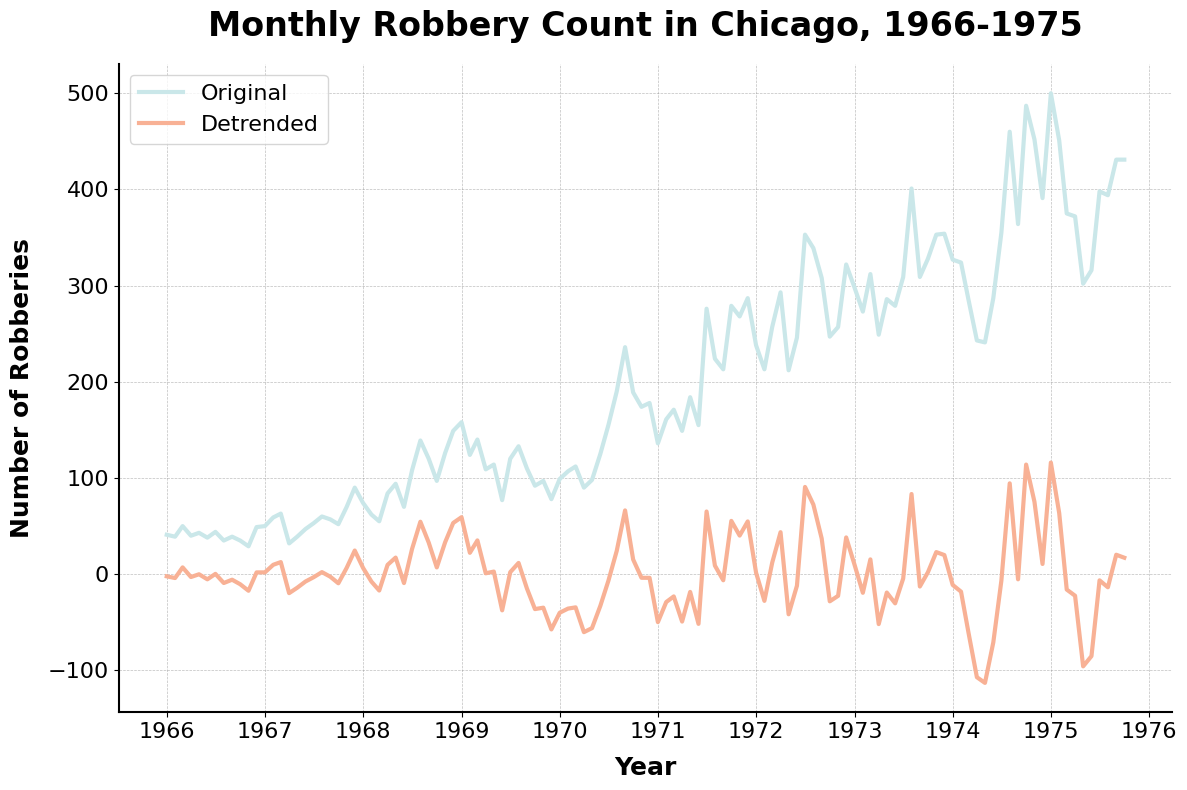

In [62]:
# Detrend the data using a polynomial fit up to order 3
t = np.arange(len(robberies))
coeffs = np.polyfit(t, robberies['Robberies'], deg=3)
poly_fit = np.polyval(coeffs, t)
detrended_robberies = robberies['Robberies'] - poly_fit

# Define custom color palette
color_palette = ['#CAE7E9', '#F8B195']

# Visualize the original and detrended data
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(robberies['Robberies'], label='Original', color=color_palette[0], linewidth=3)
ax.plot(detrended_robberies, label='Detrended', color=color_palette[1], linewidth=3)
ax.set_xlabel('Year', fontsize=18, fontweight='bold', labelpad=10)
ax.set_ylabel('Number of Robberies', fontsize=18, fontweight='bold', labelpad=10)
ax.set_title('Monthly Robbery Count in Chicago, 1966-1975', fontsize=24, fontweight='bold', pad=20)
ax.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

# Q1c.

In [81]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming you have the 'robberies' DataFrame already loaded
# Replace with your actual data if necessary

# Define a function to detrend the data with a given polynomial order and perform the ADF test
def detrend_and_adf_test(data, order):
    t = np.arange(len(data))
    coeffs = np.polyfit(t, data, deg=order)
    poly_fit = np.polyval(coeffs, t)
    detrended_data = data - poly_fit
    
    adf_result = adfuller(detrended_data)
    return adf_result[0], adf_result[1], adf_result[4]['5%']

# Loop through different polynomial orders and perform the ADF test on the detrended series
stationary_order = None
max_order = 3

for order in range(1, max_order + 1):
    adf_stat, p_value, critical_value = detrend_and_adf_test(robberies['Robberies'], order)
    
    print(f"Polynomial Order: {order}")
    print(f"P-Value: {p_value}\n")
    
    if adf_stat < critical_value:
        stationary_order = order
        break

# Print the result
if stationary_order is None:
    print("The detrended series does not become stationary up to the tested polynomial orders 3.")
else:
    print(f"The detrended series becomes stationary at a polynomial order of {stationary_order}.")

Polynomial Order: 1
P-Value: 0.43968278106711994

Polynomial Order: 2
P-Value: 0.2982467078225143

Polynomial Order: 3
P-Value: 0.254455960413474

The detrended series does not become stationary up to the tested polynomial orders 3.


# Q1d. Perform differencing on the original series to induce stationarity

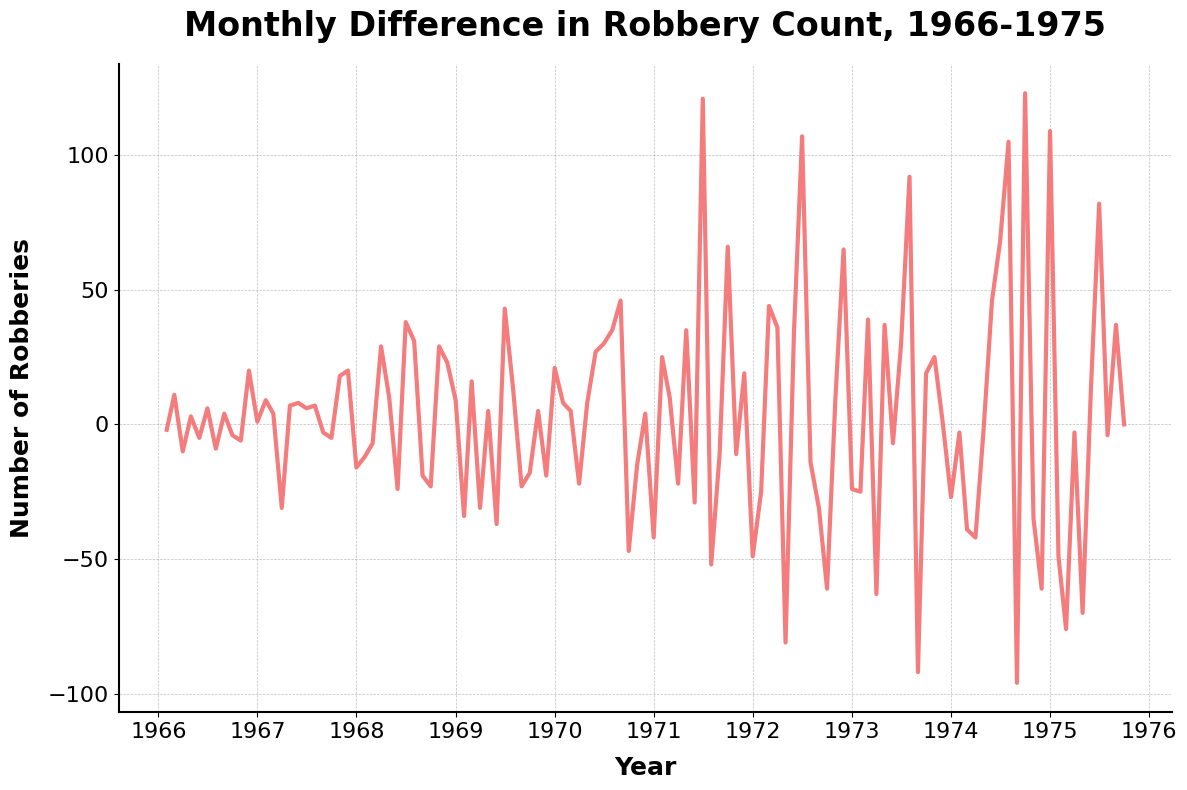

In [64]:
# Convert the data into a pandas DataFrame
robberies = pd.DataFrame(data, columns=['Month', 'Robberies'])
robberies['Month'] = pd.to_datetime(robberies['Month'])
robberies['Robberies'] = pd.to_numeric(robberies['Robberies'])
robberies.set_index('Month', inplace=True)

# Define custom color palette
color_palette = ['#F47C7C']

# Perform first-order differencing on the original series
differenced_robberies = robberies['Robberies'].diff(periods=1).dropna()

# Visualize the differenced data
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(differenced_robberies, color=color_palette[0], linewidth=3)
ax.set_xlabel('Year', fontsize=18, fontweight='bold', labelpad=10)
ax.set_ylabel('Number of Robberies', fontsize=18, fontweight='bold', labelpad=10)
ax.set_title('Monthly Difference in Robbery Count, 1966-1975', fontsize=24, fontweight='bold', pad=20)
ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

# Q1e. At what order of differencing does the series become stationary?

In [65]:
# Define a function to perform differencing and the ADF test
def difference_and_adf_test(data, order):
    differenced_data = data.diff(order).dropna()
    adf_result = adfuller(differenced_data)
    return adf_result[0], adf_result[1], adf_result[4]['5%']

# Loop through different orders of differencing and perform the ADF test
stationary_order = None
max_order = 10

for order in range(1, max_order + 1):
    adf_stat, p_value, critical_value = difference_and_adf_test(robberies['Robberies'], order)
    
    if adf_stat < critical_value:
        stationary_order = order
        break

# Print the result
if stationary_order is not None:
    print(f"The series becomes stationary at an order of differencing of {stationary_order} with a p-value of {p_value:.3f}.")
else:
    print("The series does not become stationary up to the tested orders of differencing.")

The series becomes stationary at an order of differencing of 1 with a p-value of 0.000.


# Question Number 2

In [66]:
df = pd.read_csv('champagne.csv')
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


# Q2. a
 Perform a Dickey-Fuller test on the series. Is the series stationary? 

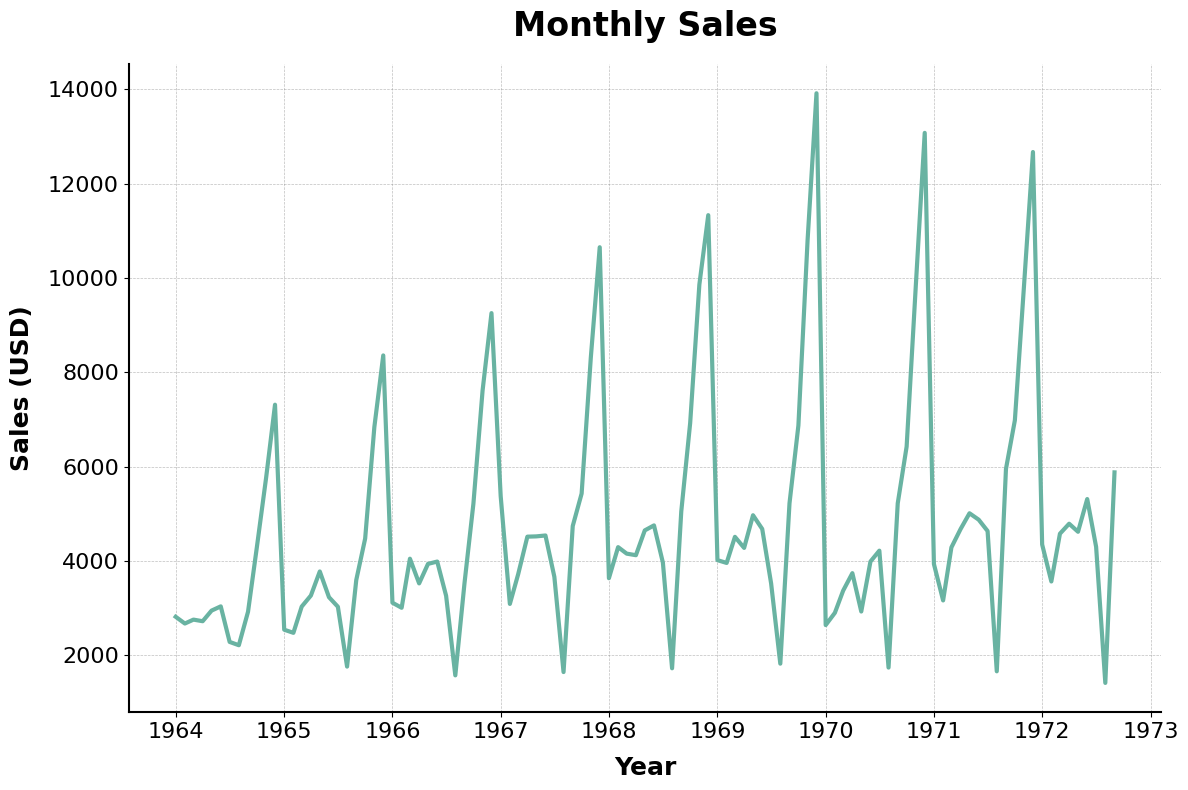

In [67]:
# Convert the data into a pandas DataFrame
sales = pd.DataFrame(df, columns=['Month', 'Sales'])
sales['Month'] = pd.to_datetime(sales['Month'])
sales.set_index('Month', inplace=True)

# Define custom color palette
color_palette = ['#69b3a2']

# Visualize the data
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(sales, color=color_palette[0], linewidth=3)
ax.set_xlabel('Year', fontsize=18, fontweight='bold', labelpad=10)
ax.set_ylabel('Sales (USD)', fontsize=18, fontweight='bold', labelpad=10)
ax.set_title('Monthly Sales', fontsize=24, fontweight='bold', pad=20)
ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

In [68]:
result = adfuller(df['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

significance_level = 0.05
if result[1] < significance_level:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -1.833593
p-value: 0.363916
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
The series is not stationary.


# Q2.b
Perform seasonal differencing to eliminate seasonality 

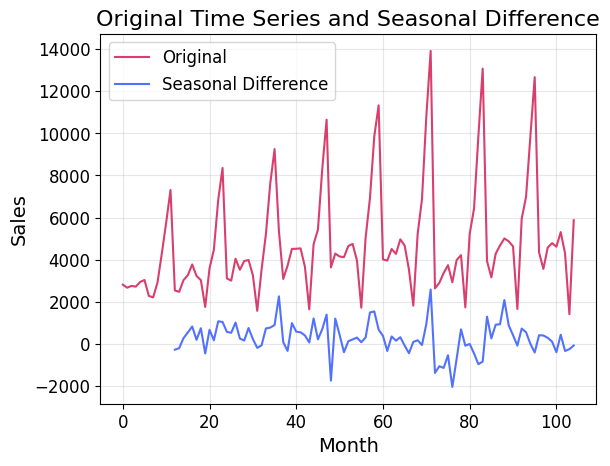

In [69]:
# Calculate the seasonal difference
seasonal_diff = df['Sales'] - df['Sales'].shift(12)

# Drop the NaN values resulting from the shift
seasonal_diff.dropna(inplace=True)

# Create a line plot of the original time series
plt.plot(df['Sales'], color='#D83F6F')

# Create a line plot of the seasonal difference time series
plt.plot(seasonal_diff, color='#5271FF')

# Add a legend and title to the plot
plt.legend(['Original', 'Seasonal Difference'], loc='upper left', fontsize=12)
plt.title('Original Time Series and Seasonal Difference', fontsize=16)

# Add x and y axis labels
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Set the font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid to the plot
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Q2.c
c. Is the resulting series stationary?

In [70]:
# Calculate the seasonal difference
seasonal_diff = df['Sales'] - df['Sales'].shift(12)

# Drop the NaN values resulting from the shift
seasonal_diff.dropna(inplace=True)

# Perform the Dickey-Fuller test on the seasonal difference
result = adfuller(seasonal_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

significance_level = 0.05
if result[1] < significance_level:
    print("The series is stationary after seasonal differencing.")
else:
    print("The series is not stationary after seasonal differencing.")

ADF Statistic: -7.626619
p-value: 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
The series is stationary after seasonal differencing.


# Q2. d
d. Perform a seasonal decomposition on the original series and plot the results

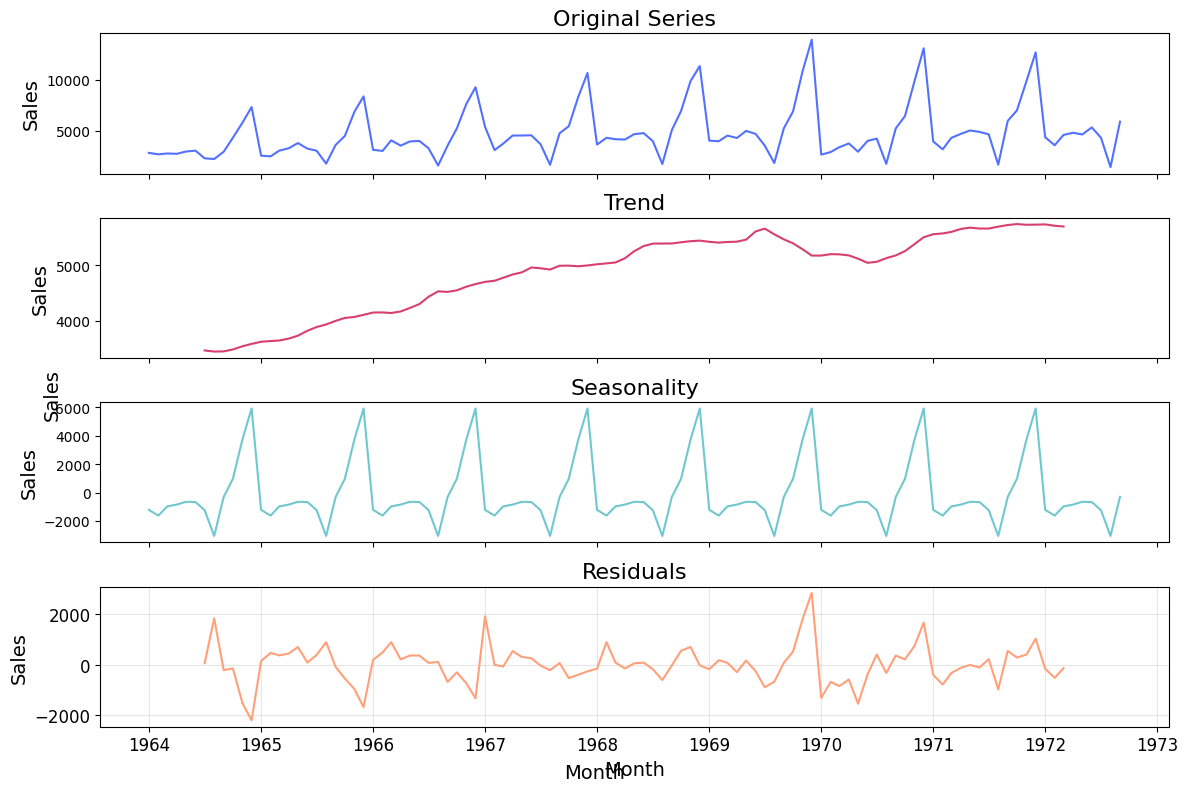

In [71]:
# Create the DataFrame (assuming you already have the data dictionary)
df = pd.DataFrame(df)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Perform the seasonal decomposition
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)

# Plot the results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

# Original series
ax1.plot(df['Sales'], color='#5271FF')
ax1.set_title('Original Series', fontsize=16)
ax1.set_ylabel('Sales', fontsize=14)

# Trend component
ax2.plot(decomposition.trend, color='#D83F6F')
ax2.set_title('Trend', fontsize=16)
ax2.set_ylabel('Sales', fontsize=14)

# Seasonal component
ax3.plot(decomposition.seasonal, color='#6FC8CE')
ax3.set_title('Seasonality', fontsize=16)
ax3.set_ylabel('Sales', fontsize=14)

# Residual component
ax4.plot(decomposition.resid, color='#FFA07A')
ax4.set_title('Residuals', fontsize=16)
ax4.set_ylabel('Sales', fontsize=14)
ax4.set_xlabel('Month', fontsize=14)

# Add x and y axis labels
fig.text(0.5, 0.02, 'Month', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Sales', va='center', rotation='vertical', fontsize=14)

# Set the font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid to the plot
plt.grid(alpha=0.3)

# Adjust the plot layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plot
plt.show()

In [72]:
df = pd.read_csv('champagne.csv')
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


# Q2. e
e. Plot a 1 year period (Jan-Dec) for only the seasonal component

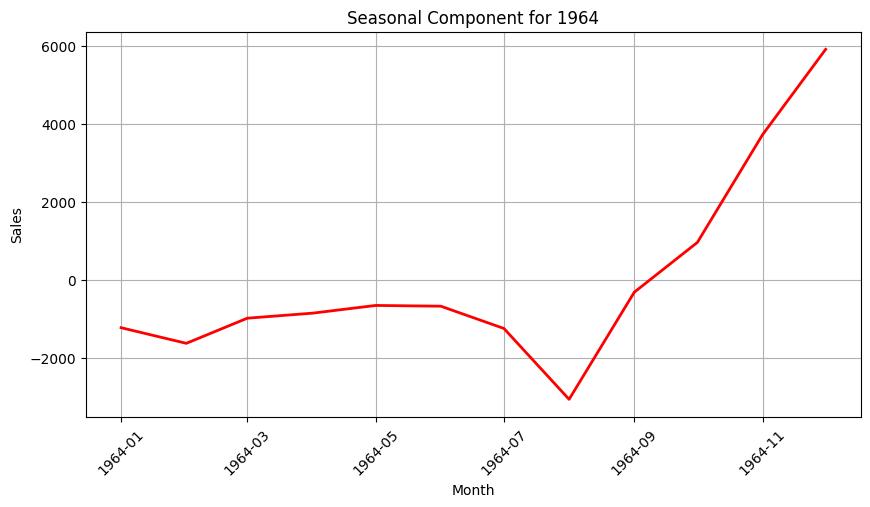

In [73]:
# Load the dataset and set the index

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Perform the seasonal decomposition
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)

# Extract the seasonal component
seasonal_component = decomposition.seasonal

# Select the desired one-year period
one_year_period = seasonal_component['1964-01':'1964-12']

# Plot the seasonal component for the one-year period
plt.figure(figsize=(10, 5))
plt.plot(one_year_period, color='red', linewidth=2)
plt.title('Seasonal Component for 1964')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Q3. a
Using ACF & PACF plots, estimate the ARMA(p,q) order

In [74]:
series = pd.read_csv(r"C:\Users\HP\Downloads\series-5.csv")
series.head()

,Unnamed: 0,0
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,-0.794418
4,4,0.892467


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data
series = pd.read_csv('series-5.csv', header=None, index_col=0, names=['Value'])

# # Convert to a Series and squeeze
# series = series['Value'].squeeze()

# # Plot ACF and PACF using 'ywm' method
# fig, axes = plt.subplots(2, 1, figsize=(12, 8))
# plot_acf(data3, ax=axes[0], lags=20)
# plot_pacf(data3, ax=axes[1], method='ywm', lags=20)
# plt.show()

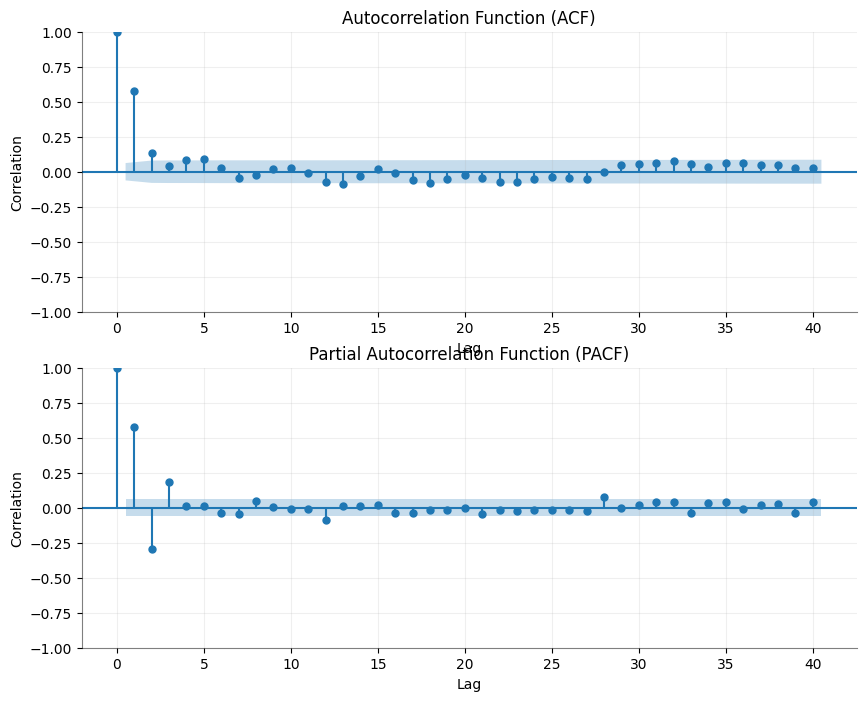

In [76]:
# Generate ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(series, ax=ax1, lags=40)
plot_pacf(series, ax=ax2, lags=40, method='ywmle')

# Set alpha value for the plots
ax1.set(title='Autocorrelation Function (ACF)', xlabel='Lag', ylabel='Correlation')
ax2.set(title='Partial Autocorrelation Function (PACF)', xlabel='Lag', ylabel='Correlation')
for ax in [ax1, ax2]:
    ax.grid(alpha=0.2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_alpha(0.5)
    ax.spines['left'].set_alpha(0.5)
plt.show()

Based on my observation of the ACF and PACF plots. The order of the ARMA(p,q) model is and AR(p) process with three 3 spikes on the PACF and also MA(q) process with 2 spikes on the ACF plots. This makes our p,q = (3,2) respectively.

Deducing from the above statements we can state that the ARMA(p,q) order is ARMA(3,2) for the series-5.csv.

# Q3. b
Going with your answer for p, calculate the a1
 - ap
 coefficients using the Yule-Walker equations 15 pts.
(Hint: np.linalg.det(matrix) makes calculating determinants easy)


In [77]:
import statsmodels.api as sm
time_series = series

def calculate_acf(time_series, nlags):
    acf_values = sm.tsa.acf(time_series, nlags=nlags, fft=False)
    return acf_values

def calculate_ar_coefficients(acf_values):
    matrix = np.array([[acf_values[0], acf_values[1], acf_values[2]],
                       [acf_values[1], acf_values[0], acf_values[1]],
                       [acf_values[2], acf_values[1], acf_values[0]]])

    rhs = np.array([acf_values[1], acf_values[2], acf_values[3]])

    a_coeffs = np.linalg.solve(matrix, rhs)
    return a_coeffs

# Calculate the ACF values for your time series
acf_values = calculate_acf(time_series, nlags=3)

# Calculate the AR coefficients using the ACF values
a_coeffs = calculate_ar_coefficients(acf_values)

print("AR coefficients:")
print("a1:", a_coeffs[0])
print("a2:", a_coeffs[1])
print("a3:", a_coeffs[2])

AR coefficients:
a1: 0.7982981809562719
a2: -0.43045596495559435
a3: 0.1813014116329015


# Q4.
The sunspot cycle is estimated at 11 years. Based on the ACF of the "Monthly Sunspots" dataset, 5 pts.
what is the sunspot cycle to the nearest month

In [78]:
data = pd.read_csv('monthly-sunspots.csv')
data.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


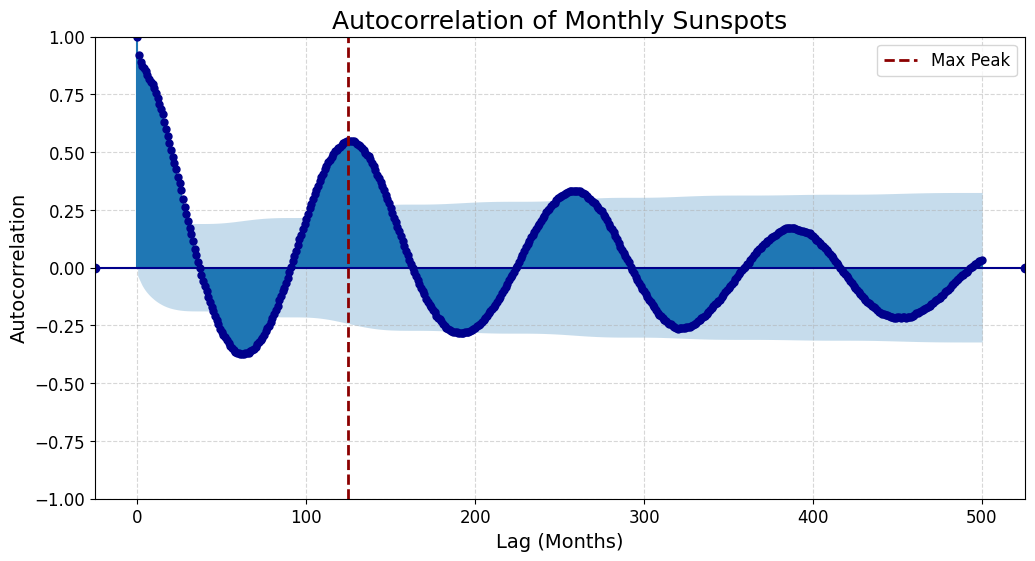

The sunspot cycle to the nearest month is 125
The sunspot cycle to the nearest year is 10.42 years


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from scipy.signal import find_peaks

# Read the data and remove the unnecessary dimensions
series = pd.read_csv("monthly-sunspots.csv", header=0, index_col=0, parse_dates=True).squeeze()

# Set the plot size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the autocorrelation function with custom color and marker
plot_acf(series, lags=500, ax=ax, color='darkblue', marker='o')

# Calculate the autocorrelation function
lags = 500
acf_vals = acf(series, nlags=lags)

# Find the peak values
peaks, _ = find_peaks(acf_vals, distance=12)  # set distance to 12 to exclude seasonal peaks
max_peak = np.max(acf_vals[peaks])

# Find the index of the max peak
max_peak_idx = np.where(acf_vals == max_peak)[0][0]

# Draw a vertical line at the position of the maximum peak with custom color and linestyle
plt.axvline(max_peak_idx, color='darkred', linestyle='--', linewidth=2, label='Max Peak')

# Customize the plot
plt.title("Autocorrelation of Monthly Sunspots", fontsize=18)
plt.xlabel("Lag (Months)", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a legend
ax.legend(fontsize=12)

# Show the plot
plt.show()
print(f"The sunspot cycle to the nearest month is {max_peak_idx}")

# Convert max_peak_idx to years
max_peak_years = max_peak_idx / 12
print(f"The sunspot cycle to the nearest year is {max_peak_years:.2f} years")